In [4]:
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    exit()

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow("Webcam Live", frame)

    # Quitter avec q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(100)

-1

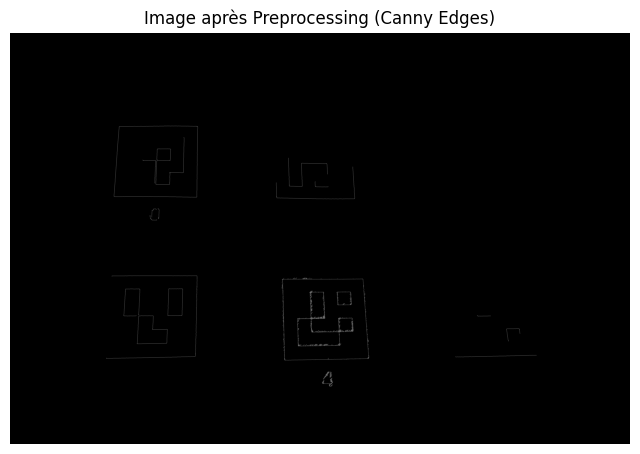

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """Convertit l'image en niveaux de gris, applique un flou et une détection de contours."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    smoothed = cv2.bilateralFilter(gray, 9, 75, 75)
    edges = cv2.Canny(smoothed, 50, 150, 5, L2gradient=True)
    return edges

# --- Utilisation ---

image_path = 'markers.jpg' # Remplacez par le chemin de votre image
image = cv2.imread(image_path)

edges = preprocess_image(image)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray') # Important: utiliser cmap='gray' pour les images N&B
plt.title("Image après Preprocessing (Canny Edges)")
plt.axis('off') # Cache les axes x et y
plt.show() # Affiche la fenêtre Matplotlib
